# 模型评价指标

## 0. 加载相关模块

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

# 用于在jupyter中进行绘图
%matplotlib inline

## 1. 数据加载

In [2]:
# 加载数据集
fruits_df = pd.read_table('fruit_data_with_colors.txt')
fruits_df.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [3]:
print('样本个数：', len(fruits_df))

样本个数： 59


In [4]:
# 划分数据集
X = fruits_df[['mass', 'width', 'height', 'color_score']]
y = fruits_df['fruit_label'].copy()

# 转换为二分类问题
y[y != 1] = 0

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/4, random_state=0)

In [5]:
print('数据集样本数：{}，训练集样本数：{}，测试集样本数：{}'.format(len(X), len(X_train), len(X_test)))

数据集样本数：59，训练集样本数：44，测试集样本数：15


## 2. 模型评价指标

In [6]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

### 2.1 准确率，精确率，召回率，F1值

In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 准确率
print('准确率：{:.3f}'.format(accuracy_score(y_test, y_pred)))

# 精确率
print('精确率：{:.3f}'.format(precision_score(y_test, y_pred)))

# 召回率
print('召回率：{:.3f}'.format(recall_score(y_test, y_pred)))

# F1值
print('F1值：{:.3f}'.format(f1_score(y_test, y_pred)))

准确率：0.800
精确率：0.600
召回率：0.750
F1值：0.667


## 2.2 PR 曲线

[PR曲线的绘制](http://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html)

In [8]:
from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, _ = precision_recall_curve(y_test, y_pred)
print('AP值：{:.3f}'.format(average_precision_score(y_test, y_pred)))

AP值：0.517


## 2.3 ROC曲线

[ROC曲线的绘制](http://scikit-learn.org/stable/auto_examples/model_selection/plot_roc_crossval.html)

In [9]:
from sklearn.metrics import roc_auc_score, roc_curve

fpr, tpr, _ = roc_curve(y_test, y_pred)
print('AUC值：{:.3f}'.format(roc_auc_score(y_test, y_pred)))

AUC值：0.784


## 2.4 混淆矩阵

[混淆矩阵的绘制](http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py)

In [10]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[9 2]
 [1 3]]


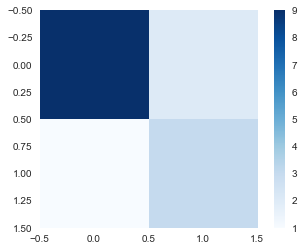

In [11]:
plt.figure()
plt.grid(False)
plt.imshow(cm, cmap=plt.cm.Blues)
plt.colorbar()

在iris数据集上使用混淆矩阵查看分类结果

In [12]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# 加载数据
iris = load_iris()

X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/4, random_state=0)

# 模型训练预测
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# 获取混淆矩阵
cm = confusion_matrix(y_test, y_pred)

# 归一化处理，得到每个分类的准确率
cm_norm = cm / cm.sum(axis=1)

print('未归一化')
print(cm)

print('归一化')
print(cm_norm)

未归一化
[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]
归一化
[[1.         0.         0.        ]
 [0.         0.9375     0.11111111]
 [0.         0.         1.        ]]


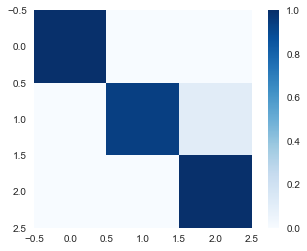

In [13]:
plt.figure()
plt.grid(False)
plt.imshow(cm_norm, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()